#### Notes
1. http://www.cs.cmu.edu/~keystroke/laser-2012/
2. http://www3.cs.stonybrook.edu/~rbanerjee/project-pages/keystrokes/keystrokes.html


In [2]:
import pandas as pd
from collections import defaultdict
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

 ##### About data "TASK"
 writing the truthful text before the deceptive one,\ 
 and vice versa.\
 each Turker was asked to copy their own typing, \
 i.e., re-type the two texts.

In [3]:
gay_merriage = pd.DataFrame(pd.read_csv("./essayVSreview/GayMarriage_400.csv", sep='\t'))
gun_control = pd.DataFrame(pd.read_csv("./essayVSreview/GunControl_400.csv", sep='\t'))
review_amt = pd.DataFrame(pd.read_csv("./essayVSreview/ReviewAMT_500_t.csv", sep='\t'))
files = [gay_merriage, gun_control, review_amt]
files_names = ['gay_merriage', 'gun_control', 'review_amt']

In [4]:
gay_merriage.head()

,UserName,AccessKey,Topic,Opinion,ReviewDate,ReviewType,Task,Group,Flow,ReviewText,ReviewMeta
0,A12WI1MRO70881,81a90739642349eb8f130f4e8f5e8deb,Gay Marriage,support,Thu May 30 04:08:13 UTC 2013,AMT,Copy_1,AMT,FT,Gay Marriage is an oxymoron even as a concept....,0 MouseUp 0 0;878 MouseUp 0 0;1691 MouseUp 0 0...
1,A12WI1MRO70881,81a90739642349eb8f130f4e8f5e8deb,Gay Marriage,support,Thu May 30 04:14:38 UTC 2013,AMT,Copy_2,AMT,FT,Marriage is about love and commitment. Its a ...,0 MouseUp 0 0;762 KeyDown 16;1160 KeyDown 77;1...
2,A12WI1MRO70881,81a90739642349eb8f130f4e8f5e8deb,Gay Marriage,support,Thu May 30 03:44:09 UTC 2013,AMT,Fake Essay,AMT,FT,Gay Marriage is an oxymoron even as a concept....,0 MouseUp 0 0;860 MouseUp 0 0;1722 MouseUp 0 0...
3,A12WI1MRO70881,81a90739642349eb8f130f4e8f5e8deb,Gay Marriage,support,Thu May 30 04:04:16 UTC 2013,AMT,True Essay,AMT,FT,Marriage is about love and commitment. Its a ...,0 MouseUp 0 0;540 MouseUp 0 0;1302 MouseUp 0 0...
4,A149ROBL26JWPJ,2005afe4d8a74f84aa78dea195ef43b0,Gay Marriage,support,Thu May 30 02:53:29 UTC 2013,AMT,Copy_1,AMT,FT,Gay marriage is not morally acceptable. It is ...,0 MouseUp 0 0;273 KeyDown 16;365 KeyDown 71;44...


In [78]:
review_amt.head()

,UserName,AccessKey,ReviewDate,ReviewTopic,Task,Group,Flow,Restaurant,Addr,Site,ReviewText,ReviewMeta
0,A002160837SWJFPIAI7L7,392aa3e372054948a5cabd637b2e239b,Sun Jun 02 20:55:38 UTC 2013,AMT,Copy_1,AMT,TF,NaN,NaN,NaN,Famous Daves is a good place to go for some go...,0 MouseUp 0 0;535 KeyDown 16;776 KeyDown 70;79...
1,A002160837SWJFPIAI7L7,392aa3e372054948a5cabd637b2e239b,Sun Jun 02 20:58:33 UTC 2013,AMT,Copy_2,AMT,TF,NaN,NaN,NaN,The Original Shrimp Place is a good place to c...,0 MouseUp 0 0;491 KeyDown 16;778 KeyDown 84;82...
2,A002160837SWJFPIAI7L7,392aa3e372054948a5cabd637b2e239b,Sun Jun 02 20:53:01 UTC 2013,AMT,Fake Review,AMT,TF,The Original Shrimp Place,NaN,NaN,The Original Shrimp Place is a good place to c...,0 MouseUp 0 0;849 KeyDown 16;966 KeyDown 84;10...
3,A002160837SWJFPIAI7L7,392aa3e372054948a5cabd637b2e239b,Sun Jun 02 20:46:25 UTC 2013,AMT,True Review,AMT,TF,Famous Daves,"Waldorf, MD",NaN,Famous Daves is a good place to go for some go...,0 MouseUp 0 0;6347 KeyDown 16;6443 KeyDown 70;...
4,A0436270XG2E3RS5T61O,2746b106ea6e42efb6104f45d6b2360c,Wed May 22 05:08:47 UTC 2013,AMT,Copy_1,AMT,FT,NaN,NaN,NaN,"Being a big admirer of Italian food, I conside...",0 MouseUp 0 0;597 KeyDown 17;1093 KeyDown 17;1...


[timestamp] KeyUp/KeyDown [javascript keycode]\
[timestamp] MouseUp [begin-index] [end-index]\

http://gcctech.org/csc/javascript/javascript_keycodes.htm

In [72]:
# editing processes (e.g., deletions,
# insertions made by changing cursor position, etc.)

#it reveals the temporal aspect of text generation
#(e.g., duration, latency)
# print(len(gay_merriage['ReviewText'][0].split('.')))
# list(filter(lambda x: len(x.split()) > 2 and x.split()[1] == 'KeyDown' and x.split()[2] == '190', gay_merriage['ReviewMeta'][0].split(';')))


ARROWS = [37, 38, 39, 40]
BACKSPACE = 8

def analise_sentance_keystroke(file):
    f_indx = file.index
    sentence_keystroke = []
    last_timestamp = 0
    for id in range(f_indx.start, f_indx.stop):
        sent_keystroke_data_dict = defaultdict(int)
        key_down_freq = []

        keystroke_meta_data = gay_merriage['ReviewMeta'][id].split(';')
        i_start = 0
        i_end = 0

        x = keystroke_meta_data[i_start]
        while len(x.split()) >= 2 and x.split()[2] != '190':
            i_end += 1
            x = keystroke_meta_data[i_end]
        for sent_event in keystroke_meta_data[i_start:i_end]:
            meta_sent_parser = sent_event.split()
            event = meta_sent_parser[1]

            # collect KeyStroke data out of the sentence
            cur_timestamp = int(meta_sent_parser[0])
            key_down_freq.append(cur_timestamp - last_timestamp)
            last_timestamp = cur_timestamp
            if event == 'MouseUp':
                sent_keystroke_data_dict['mouse_select'] += int(meta_sent_parser[3]) - int(meta_sent_parser[2])
            elif int(meta_sent_parser[2]) in ARROWS:
                sent_keystroke_data_dict['arrows'] += 1
            elif int(meta_sent_parser[2]) == BACKSPACE:
                sent_keystroke_data_dict['del'] += 1
            sent_keystroke_data_dict['key_down_freq'] = key_down_freq
        sentence_keystroke.append(sent_keystroke_data_dict)
    return sentence_keystroke


In [77]:
i = 0
for id_ in range(0, 1600):
    if gay_merriage['Task'][id_] in ['Copy_1', 'True Essay']:
        continue
    print(gay_merriage['Task'][id_])
i

Copy_2
Fake Essay
Copy_2
Fake Essay
Copy_2
Fake Essay
Copy_2
Fake Essay
Copy_2
Fake Essay
Copy_2
Fake Essay
Copy_2
Fake Essay
Copy_2
Fake Essay
Copy_2
Fake Essay
Copy_2
Fake Essay
Copy_2
Fake Essay
Copy_2
Fake Essay
Copy_2
Fake Essay
Copy_2
Fake Essay
Copy_2
Fake Essay
Copy_2
Fake Essay
Copy_2
Fake Essay
Copy_2
Fake Essay
Copy_2
Fake Essay
Copy_2
Fake Essay
Copy_2
Fake Essay
Copy_2
Fake Essay
Copy_2
Fake Essay
Copy_2
Fake Essay
Copy_2
Fake Essay
Copy_2
Fake Essay
Copy_2
Fake Essay
Copy_2
Fake Essay
Copy_2
Fake Essay
Copy_2
Fake Essay
Copy_2
Fake Essay
Copy_2
Fake Essay
Copy_2
Fake Essay
Copy_2
Fake Essay
Copy_2
Fake Essay
Copy_2
Fake Essay
Copy_2
Fake Essay
Copy_2
Fake Essay
Copy_2
Fake Essay
Copy_2
Fake Essay
Copy_2
Fake Essay
Copy_2
Fake Essay
Copy_2
Fake Essay
Copy_2
Fake Essay
Copy_2
Fake Essay
Copy_2
Fake Essay
Copy_2
Fake Essay
Copy_2
Fake Essay
Copy_2
Fake Essay
Copy_2
Fake Essay
Copy_2
Fake Essay
Copy_2
Fake Essay
Copy_2
Fake Essay
Copy_2
Fake Essay
Copy_2
Fake Essay
Copy_2
Fak

0

In [59]:
len(gay_merriage['ReviewText'][0])

871

In [71]:
l = gay_merriage['ReviewMeta'][0].split(';')
i = 0
for row in l:
    if len(row.split()) > 1:
        if row.split()[2] == '32':
            i += 1
i

326

##### Clean up the text
Feachures shouldn't use editing moments
- Backspace    8
- arrow left	37
- arrow up	38
- arrow right	39
- arrow down	40


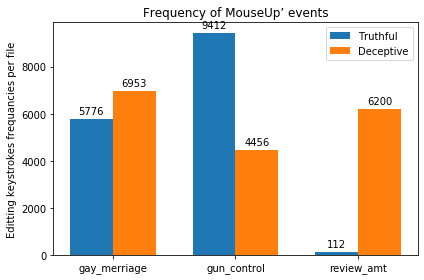

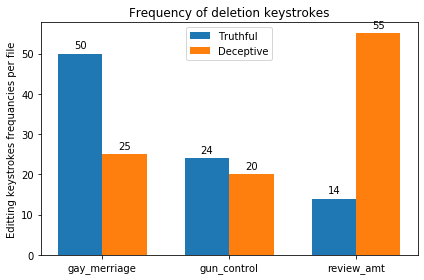

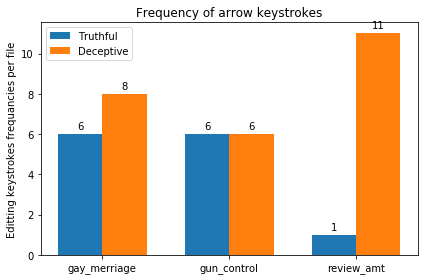

In [6]:
# Find out editing keystrokes
# element = (#del keystrokes, #'MouseUp' events, #arrow keystrokes)

ARROWS = [37, 38, 39, 40]
BACKSPACE = 8
dict_true = defaultdict(int)
dict_false = defaultdict(int)
dict_files_true_false = defaultdict(list)

# gay, review, ..
for f_i in range(0, len(files)):
    dict_true = defaultdict(int)
    dict_false = defaultdict(int)
    file = files[f_i]
    file_ind = file.index
    for row in range(file_ind.start, file_ind.stop, file_ind.step):
        dict_to_write = dict_true if file['Task'][row] in ['Copy_1', 'True Essay'] else dict_false
        tb_row_meta = file['ReviewMeta'][row].split(';')
        for i in (0, len(tb_row_meta) - 2):
            meta_row_parser = tb_row_meta[i].split()
            event = meta_row_parser[1]
            if event == 'MouseUp':
                dict_to_write['mouse_select'] += int(meta_row_parser[3]) - int(meta_row_parser[2])
            elif int(meta_row_parser[2]) in ARROWS:
                dict_to_write['arrows'] += 1
            elif int(meta_row_parser[2]) == BACKSPACE:
                dict_to_write['del'] += 1
    dict_files_true_false[files_names[f_i]] = [dict_true, dict_false]
dict_files_true_false

# plotting
plot_to_show = ['mouse_select', 'del', 'arrows']
plot_name = ['MouseUp’ events', 'deletion keystrokes', 'arrow keystrokes']
for plt_num in range(3):
    x = np.arange(len(dict_files_true_false))  # the labels ['gay_merriage', 'gun_control', 'review_amt'] locations
    width = 0.35  # the width of the bars [Truthful, Deceptive]

    fig, ax = plt.subplots()
    arr_true = []
    arr_false = []
    for file_name in files_names:
        arr_true.append(dict_files_true_false[file_name][0][plot_to_show[plt_num]])
        arr_false.append(dict_files_true_false[file_name][1][plot_to_show[plt_num]])

    rects1 = ax.bar(x - width/2, arr_true, width, label='Truthful')
    rects2 = ax.bar(x + width/2, arr_false, width, label='Deceptive')

    ax.set_title('Frequency of ' + plot_name[plt_num])
    ax.set_ylabel('Editting keystrokes frequancies per file')
    ax.set_xticks(x)
    ax.set_xticklabels(dict_files_true_false.keys())
    ax.legend()


    def autolabel(rects):
        """Attach a text label above each bar in *rects*, displaying its height."""
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')


    autolabel(rects1)
    autolabel(rects2)

    fig.tight_layout()

    plt.show()

###### How to analize text
1. we calculate the timespan of different linguistic units such as words, sentences and even entire documents
2. we separately inspect the timespans of different parts of speech, function words and content words. 
3. intervals between successive events  - (inter-word and intersentence pauses) (іноземне слово)
4. time interval before and after a function word - (pauses preceding or succeeding and event)

SyntaxError: invalid syntax (<ipython-input-7-d3f9f140b97f>, line 3)